Imports

In [8]:
from ipynb.fs.full.airbnb import DF

import pandas as pd

import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

Global Declarations

In [5]:
X = DF.drop('price', axis = 1)
X = X.drop('id', axis = 1)
y = DF[['price']]

print(DF.shape)
print(DF.dtypes)
print(DF)

(18097, 13)
id                       int64
host_id                  int64
neighbourhood_group      int64
neighbourhood            int64
latitude               float64
longitude              float64
room_type                int64
price                  float64
number_of_reviews        int64
rating                 float64
bedrooms                 int64
beds                     int64
baths                  float64
dtype: object
                       id    host_id  neighbourhood_group  neighbourhood  \
1                45277537   51501835                    1              0   
2      971353993633883038  528871354                    1              1   
3                 3857863   19902271                    1              2   
4                40896611   61391963                    1              3   
5                49584983   51501835                    1              0   
...                   ...        ...                  ...            ...   
20750  791754056397616680  429183811   

Regression Model

In [7]:
from sklearn.decomposition import PCA
PolynomialFeatures(degree=3, include_bias=False)


poly_features = poly.fit_transform(X)
poly_features = pca.fit_transform(poly_features)

X_train,X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3)

reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)

print('Intercept: ',reg_model.intercept_)
list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)

y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

reg_model_diff = pd.DataFrame({'Actual value': y_test.iloc[:, 0], 'Predicted value': y_pred.iloc[:, 0]})
reg_model_diff.dropna(inplace=True)
print(reg_model_diff)

NameError: name 'poly' is not defined

In [ ]:
#evcaluation metrics
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 34276.42749466832
Mean Absolute Error: 100.86598890258193
Root Mean Squared Error: 185.138941054194


Model Visualization

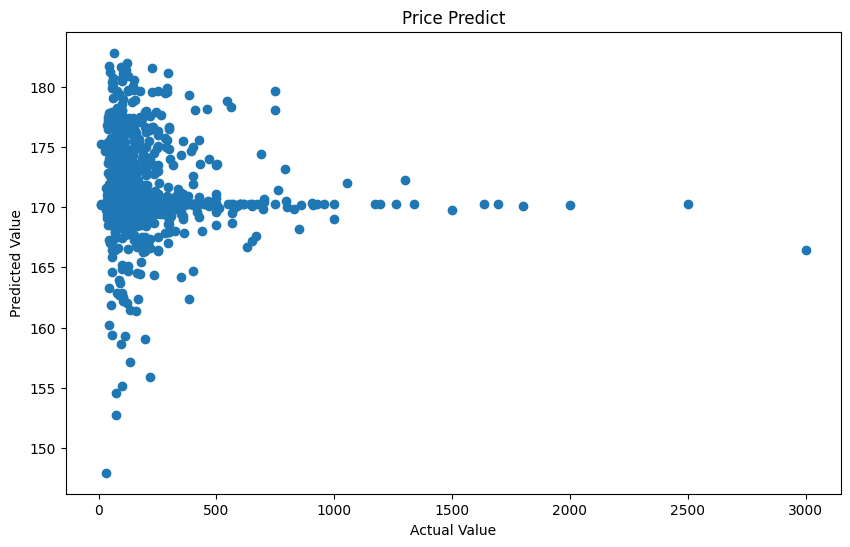

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(reg_model_diff.iloc[:, 0], reg_model_diff.iloc[:, 1])
plt.title("Price Predict")
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()